In [1]:
AoT_Data_Directory = '/Users/erinmckeon/chicago-complete.daily.2019-02-08'

In [2]:
import pandas as pd
nodes = pd.read_csv(AoT_Data_Directory + '/nodes.csv', sep=",")

nodes.head(10)

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,NaN
3,001e0610ba16,AoT_Chicago,010,Ohio St & Grand Ave Chicago IL,41.891964,-87.611603,AoT Chicago (S) [C],2017/12/01 00:00:00,2018/06/04 00:00:00
4,001e0610ba8b,AoT_Chicago,018,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN
5,001e0610ba18,AoT_Chicago,01D,Damen Ave & Cermak Chicago IL,41.852179,-87.675825,AoT Chicago (S),2017/12/15 00:00:00,NaN
6,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN
7,001e0610bbf9,AoT_Chicago,020,Western Ave & 69th St Chicago IL,41.768319,-87.683396,AoT Chicago (S) [C],2018/02/13 00:00:00,NaN
8,001e0610bbff,AoT_Chicago,025,Western Ave & 18th St Chicago IL,41.857797,-87.685806,AoT Chicago (S),2017/12/15 00:00:00,NaN
9,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN


In [3]:
nodes.shape

(91, 9)

Text(0,0.5,'Number of Nodes')

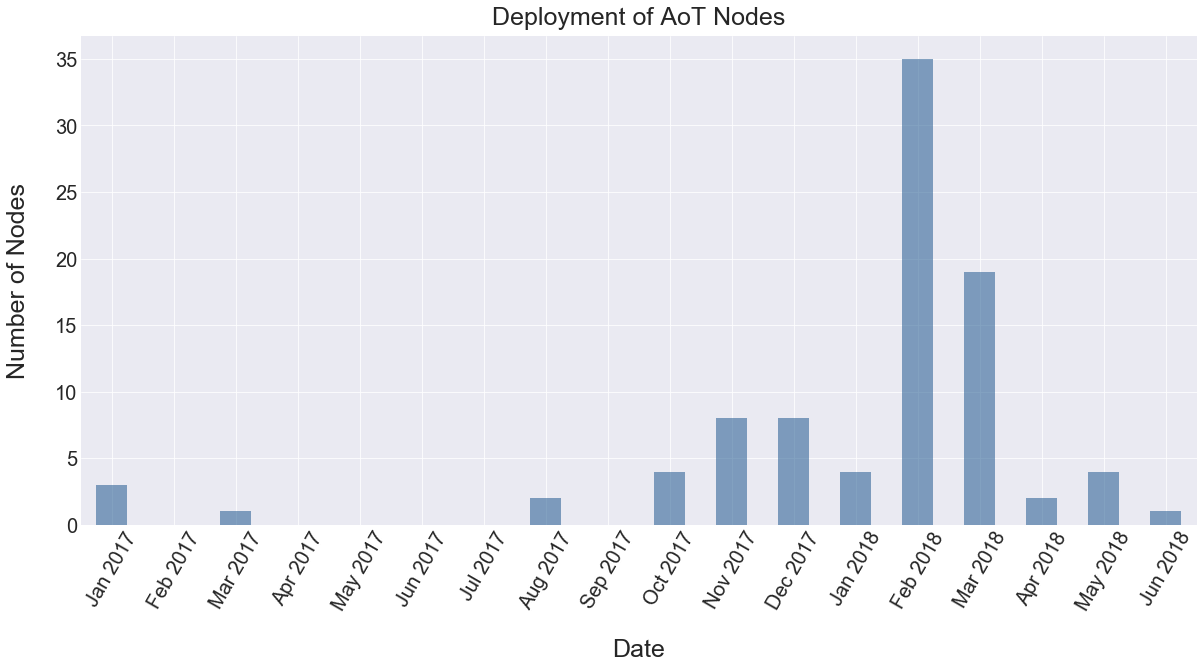

In [4]:

# Plotting the deployment of AoT nodes in Chicago based on when they started reporting data to the beehive
#
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Convert that column into a datetime datatype
nodes['start_timestamp'] = pd.to_datetime(nodes['start_timestamp'])
# Set the datetime column as the index
nodes.index = nodes['start_timestamp'] 

# Count up the number of nodes deployed in each month
nodecount = nodes['node_id'].resample('M').count()

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
nodecount.plot(kind='bar', ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6))


f = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%b %Y')
ax.set_xticklabels([ f(x.get_text()) for x in ax.get_xticklabels()])
plt.xticks(fontsize = 20, rotation=60)
plt.yticks(fontsize = 20)

# Set title and labels
ax.set_title('Deployment of AoT Nodes',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Number of Nodes',fontsize = 25, labelpad=25)

In [40]:
data = pd.read_csv('/Users/erinmckeon/chicago-complete.weekly.2019-01-28-to-2019-02-03' + '/data.csv', sep=",")

In [41]:
data.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/01/28 00:00:00,001e061135cb,metsense,hih4030,humidity,477,72.41
1,2019/01/28 00:00:00,001e061135cb,metsense,metsense,id,00001814c36b,00001814c36b
2,2019/01/28 00:00:00,001e061135cb,metsense,pr103j2,temperature,478,-9.45
3,2019/01/28 00:00:00,001e061135cb,metsense,spv1840lr5h_b,intensity,813,NaN
4,2019/01/28 00:00:00,001e061135cb,metsense,tsl250rd,intensity,0,0.0


In [42]:
air_data_co = data.loc[(data['sensor'] == "co")].copy()

In [43]:
air_data_co.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
11,2019/01/28 00:00:01,001e0610f6db,chemsense,co,concentration,1225.0,0.15402
163,2019/01/28 00:00:07,001e0610eef2,chemsense,co,concentration,1897.0,0.40573
230,2019/01/28 00:00:08,001e0610ba46,chemsense,co,concentration,1466.0,0.06502
323,2019/01/28 00:00:11,001e06112e77,chemsense,co,concentration,1187.0,0.11778
455,2019/01/28 00:00:14,001e06113cf1,chemsense,co,concentration,2416.0,0.69453


In [44]:
air_data_h2s = data.loc[(data['sensor'] == "h2s")].copy()

In [45]:
air_data_h2s.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
12,2019/01/28 00:00:01,001e0610f6db,chemsense,h2s,concentration,-674.0,-0.00599
164,2019/01/28 00:00:07,001e0610eef2,chemsense,h2s,concentration,2956.0,0.04648
231,2019/01/28 00:00:08,001e0610ba46,chemsense,h2s,concentration,711.0,-0.00151
324,2019/01/28 00:00:11,001e06112e77,chemsense,h2s,concentration,-69.0,-0.0126
456,2019/01/28 00:00:14,001e06113cf1,chemsense,h2s,concentration,-954.0,-0.00814


In [46]:
air_data_no2 = data.loc[(data['sensor'] == "no2")].copy()

In [47]:
air_data_no2.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
15,2019/01/28 00:00:01,001e0610f6db,chemsense,no2,concentration,1006.0,0.02526
167,2019/01/28 00:00:07,001e0610eef2,chemsense,no2,concentration,478.0,-0.00554
234,2019/01/28 00:00:08,001e0610ba46,chemsense,no2,concentration,866.0,0.00755
327,2019/01/28 00:00:11,001e06112e77,chemsense,no2,concentration,807.0,-0.00851
459,2019/01/28 00:00:14,001e06113cf1,chemsense,no2,concentration,1822.0,0.0404


In [48]:
air_data_o3 = data.loc[(data['sensor'] == "o3")].copy()

In [49]:
air_data_o3.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
16,2019/01/28 00:00:01,001e0610f6db,chemsense,o3,concentration,2160.0,0.00102
168,2019/01/28 00:00:07,001e0610eef2,chemsense,o3,concentration,732.0,0.0
235,2019/01/28 00:00:08,001e0610ba46,chemsense,o3,concentration,3583.0,0.03871
328,2019/01/28 00:00:11,001e06112e77,chemsense,o3,concentration,737.0,0.0
460,2019/01/28 00:00:14,001e06113cf1,chemsense,o3,concentration,4450.0,0.0


In [50]:
air_data_oxidizing = data.loc[(data['sensor'] == "oxidizing_gases")].copy()

In [51]:
air_data_oxidizing.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
17,2019/01/28 00:00:01,001e0610f6db,chemsense,oxidizing_gases,concentration,2101.0,-0.24252
169,2019/01/28 00:00:07,001e0610eef2,chemsense,oxidizing_gases,concentration,6407.0,-0.11427
236,2019/01/28 00:00:08,001e0610ba46,chemsense,oxidizing_gases,concentration,3897.0,-0.07217
329,2019/01/28 00:00:11,001e06112e77,chemsense,oxidizing_gases,concentration,46432.0,2.68607
461,2019/01/28 00:00:14,001e06113cf1,chemsense,oxidizing_gases,concentration,7197.0,-0.34672


In [52]:
air_data_reducing = data.loc[(data['sensor'] == "reducing_gases")].copy()

In [53]:
air_data_reducing.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
18,2019/01/28 00:00:01,001e0610f6db,chemsense,reducing_gases,concentration,1850.0,-0.01278
170,2019/01/28 00:00:07,001e0610eef2,chemsense,reducing_gases,concentration,5208.0,0.04519
237,2019/01/28 00:00:08,001e0610ba46,chemsense,reducing_gases,concentration,3419.0,0.03799
330,2019/01/28 00:00:11,001e06112e77,chemsense,reducing_gases,concentration,2519.0,0.01988
462,2019/01/28 00:00:14,001e06113cf1,chemsense,reducing_gases,concentration,4559.0,-0.00097


In [54]:
air_data_so2 = data.loc[(data['sensor'] == "so2")].copy()

In [55]:
air_data_so2.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
22,2019/01/28 00:00:01,001e0610f6db,chemsense,so2,concentration,-288.0,-0.00073
174,2019/01/28 00:00:07,001e0610eef2,chemsense,so2,concentration,-548.0,-0.26388
241,2019/01/28 00:00:08,001e0610ba46,chemsense,so2,concentration,176.0,0.04396
334,2019/01/28 00:00:11,001e06112e77,chemsense,so2,concentration,-247.0,0.02425
466,2019/01/28 00:00:14,001e06113cf1,chemsense,so2,concentration,-1240.0,-0.02256


In [56]:
air_data_10um = data.loc[(data['parameter'] == "10um_particle") | (data['parameter'] == "pm10") | (data['parameter'] == "pm10_atm")].copy()

In [57]:
air_data_10um.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
969,2019/01/28 00:00:23,001e06113107,alphasense,opc_n2,pm10,NaN,0.194
2052,2019/01/28 00:00:48,001e06113107,alphasense,opc_n2,pm10,NaN,0.717
3170,2019/01/28 00:01:11,001e06113107,alphasense,opc_n2,pm10,NaN,0.244
4290,2019/01/28 00:01:40,001e06113107,alphasense,opc_n2,pm10,NaN,0.212
5355,2019/01/28 00:02:06,001e06113107,alphasense,opc_n2,pm10,NaN,0.567


In [58]:
air_data_1um = data.loc[(data['parameter'] == "1um_particle") | (data['parameter'] == "pm1") | (data['parameter'] == "pm1_atm")].copy()

In [59]:
air_data_1um.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
968,2019/01/28 00:00:23,001e06113107,alphasense,opc_n2,pm1,NaN,0.188
2051,2019/01/28 00:00:48,001e06113107,alphasense,opc_n2,pm1,NaN,0.23
3169,2019/01/28 00:01:11,001e06113107,alphasense,opc_n2,pm1,NaN,0.229
4289,2019/01/28 00:01:40,001e06113107,alphasense,opc_n2,pm1,NaN,0.112
5354,2019/01/28 00:02:06,001e06113107,alphasense,opc_n2,pm1,NaN,0.267


In [60]:
air_data_25um = data.loc[(data['parameter'] == "2_5um_particle") | (data['parameter'] == "pm2_5") | (data['parameter'] == "pm25_atm")].copy()

In [61]:
air_data_25um.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
970,2019/01/28 00:00:23,001e06113107,alphasense,opc_n2,pm2_5,NaN,0.194
2053,2019/01/28 00:00:48,001e06113107,alphasense,opc_n2,pm2_5,NaN,0.335
3171,2019/01/28 00:01:11,001e06113107,alphasense,opc_n2,pm2_5,NaN,0.244
4291,2019/01/28 00:01:40,001e06113107,alphasense,opc_n2,pm2_5,NaN,0.196
5356,2019/01/28 00:02:06,001e06113107,alphasense,opc_n2,pm2_5,NaN,0.449


In [62]:
air_data_5um = data.loc[(data['parameter'] == "5um_particle") | (data['parameter'] == "point_5um_particle")].copy()

In [63]:
air_data_5um.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf


In [64]:
air_data_3um = data.loc[(data['parameter'] == "point_3um_particle")].copy()

In [65]:
air_data_3um.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf


In [66]:
print("# data points for one day:")
print("Carbon Monoxide: " + str(air_data_co.shape[0]))
print("Nitrogen Dioxide: " + str(air_data_no2.shape[0]))
print("Hydrogen Sulfide: " + str(air_data_h2s.shape[0]))
print("Sulfur Dioxide: " + str(air_data_so2.shape[0]))
print("Oxidizing gases: " + str(air_data_oxidizing.shape[0]))
print("Reducing gases: " + str(air_data_reducing.shape[0]))
print("Ozone: " + str(air_data_o3.shape[0]))
print("10um particles: " + str(air_data_10um.shape[0]))
print("5um particles: " + str(air_data_5um.shape[0]))
print("2.5um particles: " + str(air_data_25um.shape[0]))
print("1um particles: " + str(air_data_1um.shape[0]))
print("3um particles: " + str(air_data_3um.shape[0]))

# data points for one day:
Carbon Monoxide: 231067
Nitrogen Dioxide: 231067
Hydrogen Sulfide: 231067
Sulfur Dioxide: 231067
Oxidizing gases: 231067
Reducing gases: 231067
Ozone: 231067
10um particles: 30838
5um particles: 0
2.5um particles: 30838
1um particles: 30838
3um particles: 0


In [67]:
# How many sensors are reading CO, NO2, H2S, etc? (56420 readings)?
print("# nodes: ")
chem_nodes = air_data_co.node_id.unique().tolist()
print(len(chem_nodes))
print(chem_nodes)

# nodes: 
21
['001e0610f6db', '001e0610eef2', '001e0610ba46', '001e06112e77', '001e06113cf1', '001e06114500', '001e0610ee43', '001e061130f4', '001e0610ba13', '001e0610ba15', '001e0610ee33', '001e06113107', '001e0610e532', '001e06113dbc', '001e0610ef27', '001e0610b9e9', '001e0610bc12', '001e0610e537', '001e0610f703', '001e061144c0', '001e061144be']


In [69]:
# How many sensors are reading particle sizes? (3096 readings) - 
# only alphasense opc_n2 sensors?
print("# nodes: ")
particle_nodes = air_data_25um.node_id.unique().tolist()
print(len(particle_nodes))
print(particle_nodes)

# nodes: 
4
['001e06113107', '001e0610ba15', '001e06113dbc', '001e061144c0']


In [72]:
air_nodes = nodes[nodes['node_id'].isin(chem_nodes)]

In [73]:
air_nodes

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
start_timestamp,,,,,,,,,
2017-10-09,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017-10-09,NaN
2018-02-22,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2018-02-22,NaN
2018-02-15,001e0610ee33,AoT_Chicago,02D,Damen Ave & Wilson Ave Chicago IL,41.965089,-87.679076,AoT Chicago (S) [C],2018-02-15,NaN
2017-12-15,001e0610ef27,AoT_Chicago,04C,Western Ave & 25th St Chicago IL,41.846579,-87.685557,AoT Chicago (S) [C],2017-12-15,NaN
2017-12-15,001e0610e532,AoT_Chicago,053,Racine Ave & 18th St Chicago IL,41.857959,-87.656427,AoT Chicago (S) [C],2017-12-15,NaN
2018-02-26,001e06112e77,AoT_Chicago,06B,Ashland Ave & 59th St Chicago IL,41.786756,-87.664343,AoT Chicago (S) [C],2018-02-26,NaN
2018-03-15,001e0610f6db,AoT_Chicago,06D,Hutchinson Commons UChicago Chicago IL,41.791329,-87.598677,AoT Chicago (S) [C] {UChicago},2018-03-15,NaN
2017-01-01,001e06113107,AoT_Chicago,072,7801 S Lawndale Ave Chicago IL,41.751142,-87.712990,AoT Chicago (S) [CA] {ComEd},2017-01-01,NaN
2018-02-06,001e0610f703,AoT_Chicago,07F,Damen Ave & Polk St Chicago IL,41.871480,-87.676440,AoT Chicago (S) [C],2018-02-06,NaN


In [74]:
air_nodes.to_csv("airnodes.csv", sep=",")